Sample with (width, height): (25, 35) classified as Pikachu
Sample with (width, height): (15, 14) classified as Pichu
Sample with (width, height): (26, 30) classified as Pichu
Sample with (width, height): (22, 45) classified as Pikachu


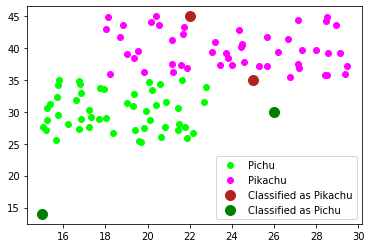

In [60]:
from matplotlib import colors
import matplotlib.pyplot as plt
import math

def remove_clutter(data:str, x_list:list, y_list:list) -> None:
        temp_coor = []
        temp = ""

        for line in data:
            temp = line
            temp = temp.replace("(","")
            temp = temp.replace(")","")
            temp = temp.replace(",","")
            temp_coor = temp.split()
            x_list.append(float(temp_coor[0]))
            y_list.append(float(temp_coor[1]))

def plot_data(data:str, color:str):
    remove_clutter(data)
    plt.scatter


with open("../Labs/ClassifyPokemon/files/pichu.txt", "r") as f_pichu, open("../Labs/ClassifyPokemon/files/pikachu.txt", "r") as f_pikachu, open("../Labs/ClassifyPokemon/files/test_points.txt", "r") as f_testpoints:

    pichu_data = f_pichu.readlines()
    pikachu_data = f_pikachu.readlines()
    test_points = f_testpoints.readlines()
    pichu_data.pop(0)
    pikachu_data.pop(0)
    pikachu_x = []
    pikachu_y = []
    pichu_x = []
    pichu_y = []
    test_points_x = []
    test_points_y = []
    
    
    remove_clutter(pichu_data, pichu_x, pichu_y)
    remove_clutter(pikachu_data, pikachu_x, pikachu_y)
    remove_clutter(test_points, test_points_x, test_points_y)

    plt.scatter(pichu_x, pichu_y, c="lime")
    plt.scatter(pikachu_x, pikachu_y, c="magenta")

    point = (25, 35)
    classified_pichu =  []
    classified_pikachu = []
    avrg_pichu = 0
    avrg_pikachu = 0
    
        
    def classify_five_points():
        for j in range(4):
            distances_pichu = []
            distances_pikachu = []
            for i in range(50):
                distances_pichu.append(math.sqrt((pichu_x[i] - test_points_x[j])**2 + (pichu_y[i] - test_points_y[j])**2))
            for i in range(50):
                distances_pikachu.append(math.sqrt((pikachu_x[i] - test_points_x[j])**2 + (pikachu_y[i] - test_points_y[j])**2))

            distances_pichu.sort()
            distances_pikachu.sort()

            avrg_pichu = sum(distances_pichu[0:5]) / len(distances_pichu[0:5])
            avrg_pikachu = sum(distances_pikachu[0:5]) / len(distances_pikachu[0:5])

            if avrg_pichu < avrg_pikachu:
                print(f"Sample with (width, height): ({test_points_x[j]:.0f}, {test_points_y[j]:.0f}) classified as Pichu")
            else:
                print(f"Sample with (width, height): ({test_points_x[j]:.0f}, {test_points_y[j]:.0f}) classified as Pikachu")


    def classify_closest_point():        
        for j in range(4):
            distances_pichu = []
            distances_pikachu = []
            for i in range(50):
                distances_pichu.append(math.sqrt((pichu_x[i] - test_points_x[j])**2 + (pichu_y[i] - test_points_y[j])**2))
            for i in range(50):
                distances_pikachu.append(math.sqrt((pikachu_x[i] - test_points_x[j])**2 + (pikachu_y[i] - test_points_y[j])**2))

            distances_pichu.sort()
            distances_pikachu.sort()

            if distances_pichu[0] < distances_pikachu[0]:
                print(f"Sample with (width, height): ({test_points_x[j]:.0f}, {test_points_y[j]:.0f}) classified as Pichu")
                plt.scatter(test_points_x[j],test_points_y[j], c="green", s=100)
            else:
                print(f"Sample with (width, height): ({test_points_x[j]:.0f}, {test_points_y[j]:.0f}) classified as Pikachu")
                plt.scatter(test_points_x[j],test_points_y[j], c="firebrick", s=100)
    classify_closest_point()
    plt.legend(["Pichu", "Pikachu", "Classified as Pikachu", "Classified as Pichu"])

    